In [1]:
from google.colab import files
uploaded=files.upload()

Saving tmdb_5000_credits.csv to tmdb_5000_credits.csv


In [4]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df = pd.read_csv("tmdb_5000_credits.csv")

df['director'] = df['crew'].apply(lambda x: next((i['name'] for i in eval(x) if i['job'] == 'Director'), ''))
df['cast'] = df['cast'].apply(lambda x: ' '.join([i['name'] for i in eval(x)[:2]]))
df['features'] = df['cast'] + ' ' + df['director']

cv = CountVectorizer(max_features=1000, stop_words='english')
X = cv.fit_transform(df['features']).toarray()

np.random.seed(1)
y = np.random.uniform(6.0, 9.0, size=len(df))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model = RandomForestRegressor(n_estimators=20, max_depth=10, random_state=1, n_jobs=-1)
model.fit(X_train, y_train)

pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, pred))

print("RMSE:", rmse)


RMSE: 0.8749064251736975


In [5]:
from google.colab import files
uploaded=files.upload()

Saving data.csv to data.csv


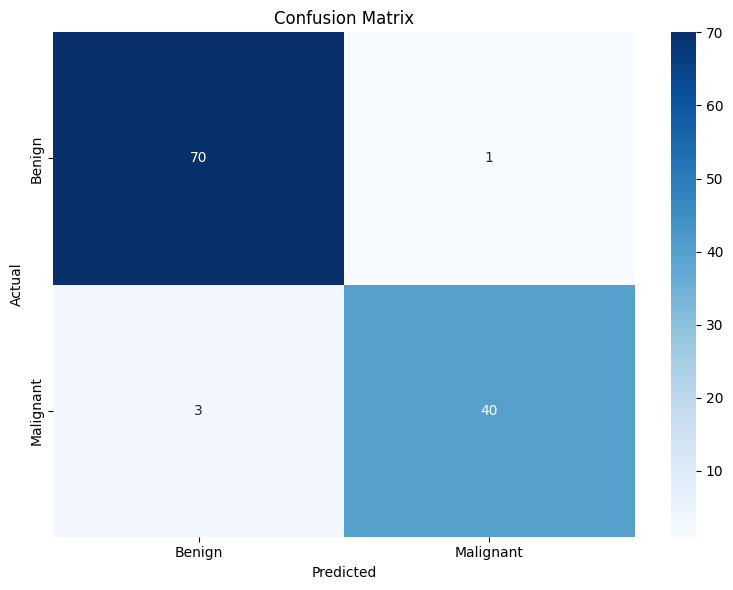

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

df = pd.read_csv('data.csv')
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

print(cr)


In [7]:
def chatbot():
    print("Chatbot: Hello! I'm a simple chatbot. Type 'exit' to quit.")
    while True:
        user_input = input("You: ").lower()

        if 'hello' in user_input or 'hi' in user_input:

            print("Chatbot: Hello there! How can I help you today?")
        elif 'how are you' in user_input:
            print("Chatbot: I'm just a program, but I'm doing great! Thanks for asking.")
        elif 'your name' in user_input:
            print("Chatbot: I'm a rule-based chatbot created to assist you.")
        elif 'help' in user_input:
            print("Chatbot: Sure! I can answer basic questions. Try asking about me or just say hello.")
        elif 'bye' in user_input or 'exit' in user_input:
            print("Chatbot: Goodbye! Have a great day.")
            break
        else:
            print("Chatbot: I'm sorry, I don't understand that. Try asking something else.")

chatbot()


Chatbot: Hello! I'm a simple chatbot. Type 'exit' to quit.
You: HELLO
Chatbot: Hello there! How can I help you today?
You: BYE
Chatbot: Goodbye! Have a great day.
